#Método 4 : Encontrar una solución para f(x) = 0 sin conocer su derivada

#**MÉTODO DE LA SECANTE**

> Para evitar el problema de la evaluación de la derivada en el método de Newton, se presenta una variación.

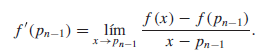

Si Pn-2 esta cerca de Pn-2, entonces:

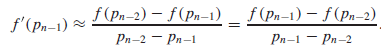

Usando esta aproximación para f'(Pn–1) en la fórmula de Newton obtenemos:

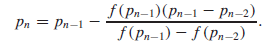

Esta técnica recibe el nombre de método de la secante. Empezando con dos aproximaciones p0 y p1, la aproximación p2 es la intersección en x de la recta que une los puntos (p0, f(p0)) y (p1, f(p1)). La aproximación p3 es la intersección en x de la recta que une los puntos (p1, f (p1)) y (p2, f(p2)) y así sucesivamente.

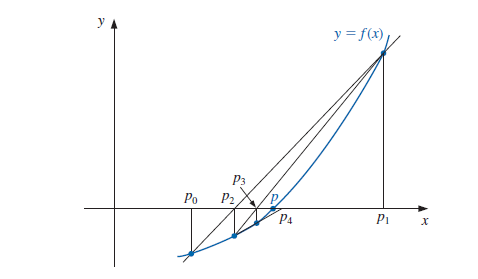

#**Implementación del método:**

*   Precione play en cada bloque descendiendo y esperar que carguen cada uno.
*   Ingresar datos de entrada.
*   Para utilizar de nuevo suba hasta arriba y vuelva a precionar play en cada bloque.

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from math import *
import sympy


def function(funcion,numero):
  x = sympy.symbols('x')
  expresion = funcion
  return (sympy.sympify(expresion).subs(x,numero))


def secant_method(expresion,aprox1,aprox2,tol = 1e-6,iterations = 100):
    #paso 1:
    i = 2
    p0 = aprox1
    p1 = aprox2
    q0 = function(expresion,p0)
    q1 = function(expresion,p1)
    key = False
    valuesP = []
    valuesFP = []
    
    #paso 2:
    while i <= iterations:
        plt.scatter(p0,function(expresion,p0))
        if(q1 - q0) == 0:
            print('hay cociente 0')
            break
        
        p = p1 - (q1*(p1-p0))/(q1-q0) #paso 3: calculo de Pi
        valuesP.append(p)
        valuesFP.append(function(expresion,p)) #guardamos datos
        if abs(p-p1) < tol: #paso 4: proceso exitoso
            key = True
            print('Se terminó el numero de iteraciones')
            values = pd.DataFrame(
            {
              'x': valuesP,
              'y': valuesFP
            }
            )
            return(p,values)        
        i += 1 #paso 5:
        #paso 6: Actializacion
        p0 = p1
        q0 = q1
        p1 = p
        q1 = function(expresion,p)
    #salida
    #paso 7: termino de iteraciones
    if(key == False):
        print('El método falló')
        return(None,None)


# **Ingrese su función**


1.   La fución debe debe estar expresada en función de x.
2.   solo se deve incluir el lado derecho de la función.

En python los operadores aritmeticos son los siguientes

*   Para suma +
*   Para resta -
*   Para división /
*   Para multiplicación *
*   Para exponente **

> Ejemplo:


> (x + 3) ** 3 + 2 * (x) ** 2 - 20


>Entrada x1=-1, x2=-2,  


**Entrada de Función** (presionar play)

In [32]:
exp = input('Ingrese una funcion expresada en x : F(x) = ')

Ingrese una funcion expresada en x : F(x) = exp(x)-5


[GRAFIQUE SU FUNCIÓN EN EL SIGUIENTE ENLACE PARA ENCONTRAR LOS PUNTOS X1 y X2 ](https://www.geogebra.org/classic?lang=es)

**Entrada de x1 y x2** (presionar play)

In [33]:
i = float(input('Ingrese aproximación inicial x1: '))

Ingrese aproximación inicial x1: 2


In [34]:
j = float(input('Ingrese aproximación inicial x2: '))

Ingrese aproximación inicial x2: 1


Se terminó el numero de iteraciones


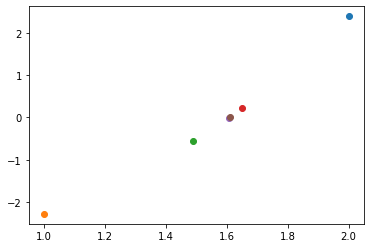

In [35]:
try:
  resultado = secant_method(exp,i,j)
except Exception as e:
  print("Hubo un error tipo: ",e)

**Tabla de resultados de iteraciones:**

In [36]:
resultado[1]

,x,y
0,1.48850962162009,-0.569512506774898
1,1.65099730923707,0.212175386617785
2,1.60689289335424,-0.0127089163222731
3,1.60938537203581,-0.000262695090344600
4,1.60943797932120,3.34435529047994e-7
5,1.60943791243234,-8.78586092767364e-12


**Resultado de la raiz**

In [37]:
print('El resultado de la raiz aproximada es ',resultado[0])

El resultado de la raiz aproximada es  1.60943791243234


**Gráfica(precione play)**

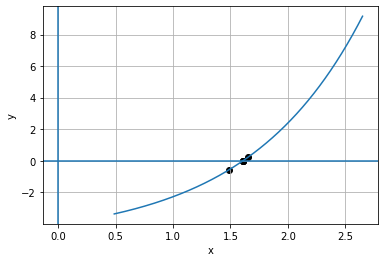

In [38]:
import numpy as np
j = np.arange(min(resultado[1]['x']) - 1,max(resultado[1]['x']) + 1 ,0.001)
i = sympy.symbols('x')
expresion = exp
y = [sympy.sympify(expresion).subs(i,k) for k in j]
plt.plot(j,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
y = [sympy.sympify(expresion).subs(i,k) for k in resultado[1]['x']]
plt.scatter(resultado[1]['x'],y,color='black')
plt.axhline(0)
plt.axvline(0)
plt.show()